
#**Data** **Extraction**
we extract the **Student Performance**  **Factor** dataset from the uploaded zip archive and load it into a **Pandas** **Dataframe**. This allows us to programmatically access and analyze the data for our prediction model.



In [2]:
import zipfile
with zipfile.ZipFile('studentperformance.zip','r') as zip_ref:
  zip_ref.extractall()



  import pandas as pd
  df = pd.read_csv('StudentPerformanceFactors.csv')
  df.head()

#**Data** **Cleaning**
In this step , we perform **Exploratory** **Data Analysis** (EDA) to identify missing values across the dataset. We specifically focus on cleaning the primery variables__ **Hours_Studied** and **Exam_Score**__ by removing any incomplete records (NaN) to ensure the accuracy and reliability of our Linear Regression Model.

In [3]:
print(df.isnull().sum())
df_clean = df.dropna(subset=['Hours_Studied','Exam_Score'])
print("\nCleaned Data Summary:")
print(df_clean[['Hours_Studied','Exam_Score']].isnull().sum())

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Cleaned Data Summary:
Hours_Studied    0
Exam_Score       0
dtype: int64


#**Linear Regression** **Model** **Implementation**
we are now implementing a simple Linear Regression Model to establish a mathematical relationship between a student's study hours and their final exam scores. This model will help us predict future perfomance based on study habits.


In [4]:
from sklearn.linear_model import LinearRegression
X = df_clean[['Hours_Studied']]
y = df_clean['Exam_Score']
model = LinearRegression()
model.fit(X,y)
print ("Linear Regression Model Trained Successfully!")

Linear Regression Model Trained Successfully!


**Model** **Visualization** **and** **Results**

In this final step, we visualize the relationship between 'Hours_Studied' and 'Exam_Score'. The blue points represent the actual data from the dataset, while the red line indicates the predictions mode by our Linear Regression model (the line of Best Fit).


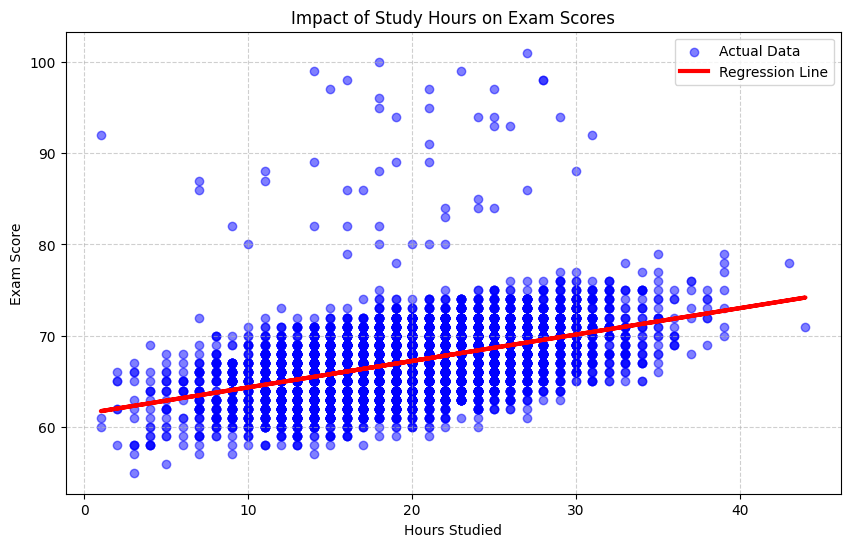

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Actual Data')
plt.plot(X, model.predict(X), color='red', linewidth=3, label='Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.title('Impact of Study Hours on Exam Scores')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X)
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R_squared Score (Accuracy): {r2:.2f}")

Mean Squared Error (MSE): 12.13
R_squared Score (Accuracy): 0.20


**BONUS** **TASK** : **Improving** **Model** **with** **Multiple** **Features**

In this section, i am experimenting with multiple features to see if adding more information improves the model's accuracy. Instead of just using Hours_Studied, Iam now including Attendance and Sleep_Hours to predict the Exam_Score. This helps in understanding how different factors combined affect student performance.

In [8]:
X_bonus = df [['Hours_Studied','Attendance','Sleep_Hours']]
y_bonus = df['Exam_Score']
model_bonus = LinearRegression()
model_bonus.fit(X_bonus,y_bonus)
y_pred_bonus = model_bonus.predict(X_bonus)
r2_bonus = r2_score(y_bonus,y_pred_bonus)
mse_bonus = mean_squared_error(y_bonus, y_pred_bonus)
print (f"--- Model Comparison ---")
print (f"Origional R_squared (Single Feature): {r2:.2f}")
print (f"New R_squared (Multipple Features):{r2_bonus:.2f}")
print (f"New Mean SquaredError:{mse_bonus:.2f}")

--- Model Comparison ---
Origional R_squared (Single Feature): 0.20
New R_squared (Multipple Features):0.54
New Mean SquaredError:6.94


**Polynomial** **Regression**

i am implementing Polynomial Regression to check if a non_linear relationship(curve) fits the study hours and exam scores better than a straight line. This is part of the bonus requirements to compare different model performances.



In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
poly_model = LinearRegression()
poly_model.fit(X_poly,y)
y_poly_pred = poly_model.predict(X_poly)
r2_poly = r2_score(y,y_poly_pred)
print (f"Polynomial R_squared Score: {r2_poly:.2f}")

Polynomial R_squared Score: 0.20


/tmp/ipython-input-713000482.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X.values),max(X.values), 0.1).reshape(-1,1)


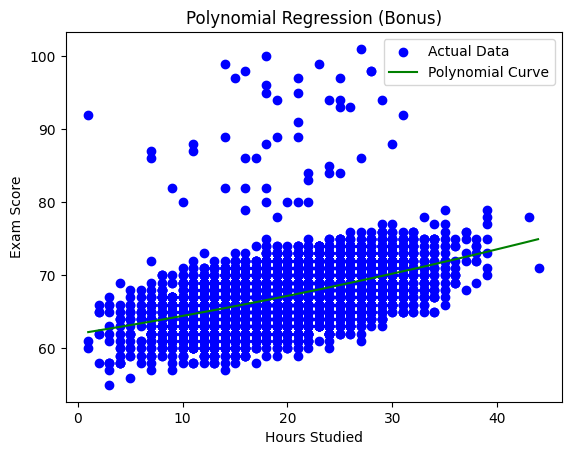

In [13]:
import numpy as np
X_grid = np.arange(min(X.values),max(X.values), 0.1).reshape(-1,1)
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X_grid, poly_model.predict(poly.fit_transform(X_grid)),color = 'green',label= 'Polynomial Curve')
plt.title('Polynomial Regression (Bonus)')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.legend()
plt.show()